In [12]:
# Some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import ast
import re

Handle and Clean the movie and character metadata dataframe:

1) download
2) visualise 
3) clean (drop and transform)
4) merge 
5) save final dataframe



In [13]:
# Load the general data:
character_metadata_path = '../data/raw_data/character.metadata.tsv'
movie_metadata_path = '../data/raw_data/movie.metadata.tsv'

character_metadata = pd.read_csv(character_metadata_path, sep='\t')
movie_metadata = pd.read_csv(movie_metadata_path, sep='\t')

# Visualise the DataFrames (to see with what we are working):
print(f'the size of the dataframe is:{character_metadata.shape}') #-- shape = (450668, 13)
display(character_metadata) #need to rename the columns

the size of the dataframe is:(450668, 13)


,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.62,Unnamed: 7,Wanda De Jesus,42,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
3,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
4,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450663,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450664,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450665,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450666,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [14]:
print(f'the size of the dataframe is:{movie_metadata.shape}') #-- shape = (81740, 9)
display(movie_metadata) #need to rename the columns

the size of the dataframe is:(81740, 9)


,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science Fiction"", ""/m/03npn"": ""Horror"", ""/m/03k9fj"": ""Adventure"", ""/m/0fdjb"": ""Supernatural"", ""/m/02kdv5l"": ""Action"", ""/m/09zvmj"": ""Space western""}"
0,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
1,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
3,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
4,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
...,...,...,...,...,...,...,...,...,...
81735,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81736,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81737,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81738,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [15]:
# The column titles need to be rename with the name given in the read.me of the dataset
new_column_names_c = [
    "Wikipedia_movie_ID",
    "Freebase_movie_ID",
    "Movie_release_date",
    "Character_name",
    "Actor_date_of_birth",
    "Actor_gender",
    "Actor_height_m",
    "Actor_ethnicity",
    "Actor_name",
    "Actor_age_at_movie_release",
    "Freebase_character_actor_map_ID",
    "Freebase_character_ID",
    "Freebase_actor_ID"
]

new_column_names_m = [
    "Wikipedia_movie_ID",
    "Freebase_movie_ID",
    "Movie_name",
    "Movie_release_date",
    "Movie_box_office_revenue",
    "Movie_runtime",
    "Movie_languages",
    "Movie_countries",
    "Movie_genres"
]

# Rename the columns by directly setting DataFrame.columns
character_metadata.columns = new_column_names_c
movie_metadata.columns = new_column_names_m


In [16]:
# Function to plot the percentage of missing values for each column
def plot_missing_percentage(dataframe):
    missing_percentage = dataframe.isna().mean() * 100  # Calculate the percentage of NaNs

    plt.figure(figsize=(10, 5))
    plt.bar(dataframe.columns, missing_percentage)
    plt.title("Percentage of Missing Values per Column in Character_metadata")
    plt.xlabel("Columns")
    plt.ylabel("Percentage of Missing Values (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to plot the number of rows remaining after dropping missing values per column
def plot_remaining_rows(dataframe):
    remaining_rows = dataframe.apply(lambda col: len(col.dropna()))  # Rows left after dropping NaNs per column

    plt.figure(figsize=(10, 5))
    plt.bar(dataframe.columns, remaining_rows)
    plt.title("Remaining Row Count after Dropping Missing Values per Column in Character_metadata")
    plt.xlabel("Columns")
    plt.ylabel("Number of Remaining Rows")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

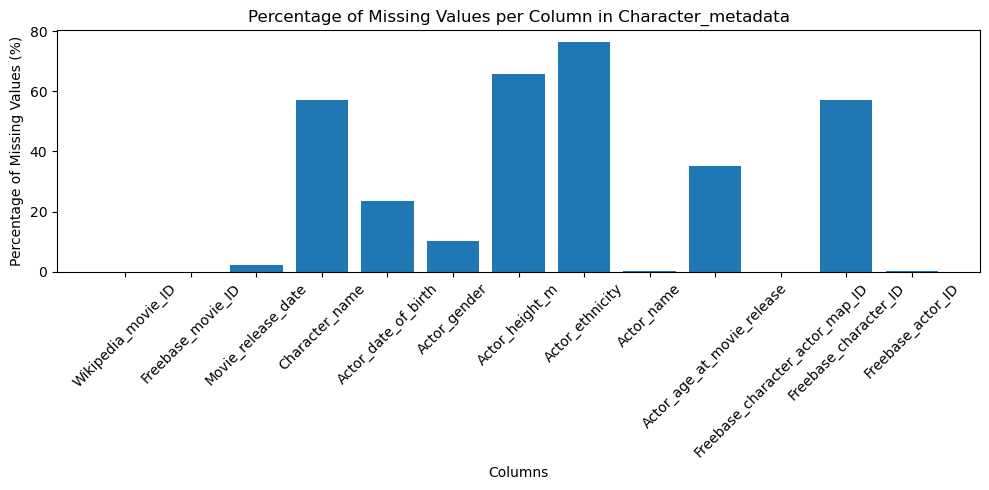

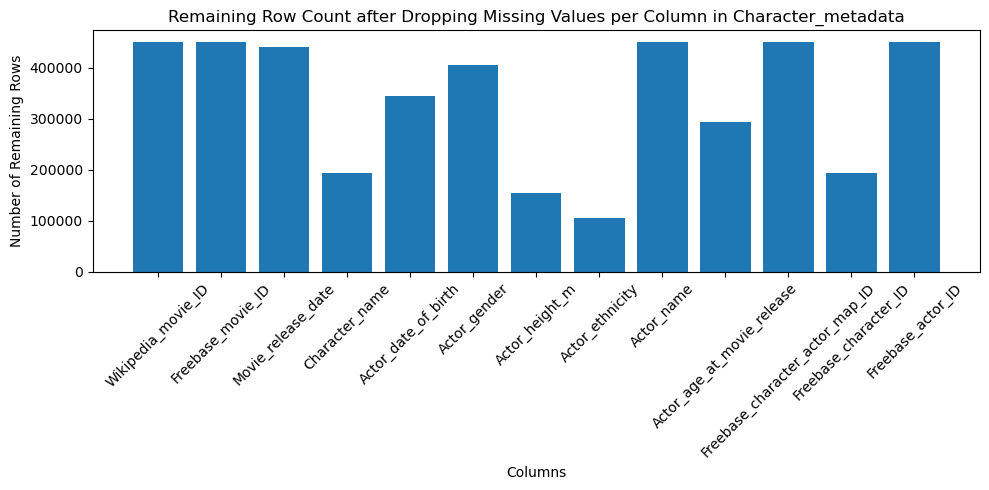

Remaining rows for 'Wikipedia_movie_ID': 450668
Remaining rows for 'Movie_release_date': 440673
Remaining rows for 'Actor_ethnicity': 106058


,Wikipedia_movie_ID,Movie_release_date,Actor_ethnicity
0,975900,2001-08-24,/m/044038p
1,975900,2001-08-24,/m/0x67
4,975900,2001-08-24,/m/0x67
10,975900,2001-08-24,/m/064b9n
26,3196793,2000-02-16,/m/0x67
...,...,...,...
450626,23687925,1952,/m/0xnvg
450630,30553937,1998-03-07,/m/033tf_
450642,12476867,2002,/m/041rx
450643,12476867,2002,/m/041rx


In [17]:
# Clean the character metadata dataframe:

plot_missing_percentage(character_metadata)
plot_remaining_rows(character_metadata)

# We continue the analysis only on the column of interest:
# Wikipedia_movie_ID, Movie_release_date, Actor_ethnicity

# Check the exact count of remaining rows for these columns
columns_to_check = ['Wikipedia_movie_ID', 'Movie_release_date', 'Actor_ethnicity']
remaining_rows = {col: character_metadata[col].dropna().shape[0] for col in columns_to_check}
# Print the results
for col, count in remaining_rows.items():
    print(f"Remaining rows for '{col}': {count}")

# We only keep the rows where all the three information are available
filtered_character = character_metadata[['Wikipedia_movie_ID', 'Movie_release_date', 'Actor_ethnicity']].dropna(subset=['Actor_ethnicity']) 
filtered_character = filtered_character[['Wikipedia_movie_ID', 'Movie_release_date', 'Actor_ethnicity']].dropna(subset=['Movie_release_date'])
filtered_character = filtered_character[['Wikipedia_movie_ID', 'Movie_release_date', 'Actor_ethnicity']].dropna(subset=['Wikipedia_movie_ID'])

# Display the new filtered DataFrame
display(filtered_character)

In [18]:
# We need to clean release date (as we see that there is several ways to write the date)
filtered_character['Movie_release_date'] = filtered_character['Movie_release_date'].astype(str).str[:4]

# Display the updated DataFrame
display(filtered_character)

,Wikipedia_movie_ID,Movie_release_date,Actor_ethnicity
0,975900,2001,/m/044038p
1,975900,2001,/m/0x67
4,975900,2001,/m/0x67
10,975900,2001,/m/064b9n
26,3196793,2000,/m/0x67
...,...,...,...
450626,23687925,1952,/m/0xnvg
450630,30553937,1998,/m/033tf_
450642,12476867,2002,/m/041rx
450643,12476867,2002,/m/041rx


In [20]:
# We want to replace the ethnicity code by the ethnicity 
# To do so we need an external database

# Mapping freebase to wikidata id
# Import csv
def fb_to_wiki(freebase_id):  #pas encore utilisé mais peut etre utile pour autre chose
    # Open and read the .tsv file
    map_table = "../data/fb_wiki_mapping.tsv"
    with open(map_table, mode='r', newline='', encoding='utf-8') as tsv_file:
        reader = csv.reader(tsv_file, delimiter='\t')
        for row in reader:
            # The columns in the .tsv file are: freebase_id, wikidata_id, label
            if row[0] == freebase_id:  # Check if the Freebase ID matches
                wikidata_id = row[1]
                label = row[2]
                return wikidata_id, label
    return None, None  # Return None if Freebase ID is not found

def fb_to_label(freebase_id,conversion_table):
    if freebase_id in conversion_table.index:
        return conversion_table.loc[freebase_id,'label']
    else:
        return None   
    
# Change column of the ethnicities
# List all ethnicities
ethnicities = filtered_character['Actor_ethnicity'].unique()
ethnicities_list = ethnicities.tolist()
fb_wiki_gen = pd.read_csv('../data/raw_data/fb_wiki_mapping.tsv',sep='\t')
fb_wiki_gen.set_index('freebase_id',inplace=True)
fb_wiki_ethnic = fb_wiki_gen.loc[fb_wiki_gen.index.isin(ethnicities_list)]  #we now have a smaller df which will correspond the right freebase_id to wiki_id and label

character_final_df = filtered_character.copy()
character_final_df['Actor_ethnicity'] = character_final_df['Actor_ethnicity'].apply(fb_to_label, conversion_table=fb_wiki_ethnic)

character_final_df = character_final_df.dropna(subset=['Actor_ethnicity'])
character_final_df['Actor_ethnicity'] = character_final_df['Actor_ethnicity'].astype(str)

print("DataFrame shape:", character_final_df.shape)
display(character_final_df.sample(10))

DataFrame shape: (90195, 3)


,Wikipedia_movie_ID,Movie_release_date,Actor_ethnicity
83559,2018791,1956,African Americans
175741,386124,2002,African Americans
265480,3936140,2006,Scottish Americans
263436,23830211,2000,Irish Americans
15776,28327405,2004,Jewish people
345618,19714168,1992,Nair
190969,1942317,2000,Jewish people
140345,25792093,2010,Indian
428664,25322634,2010,African Americans
372700,3030811,2007,Marwari


Mean length of 'Actor_ethnicity': 12.44


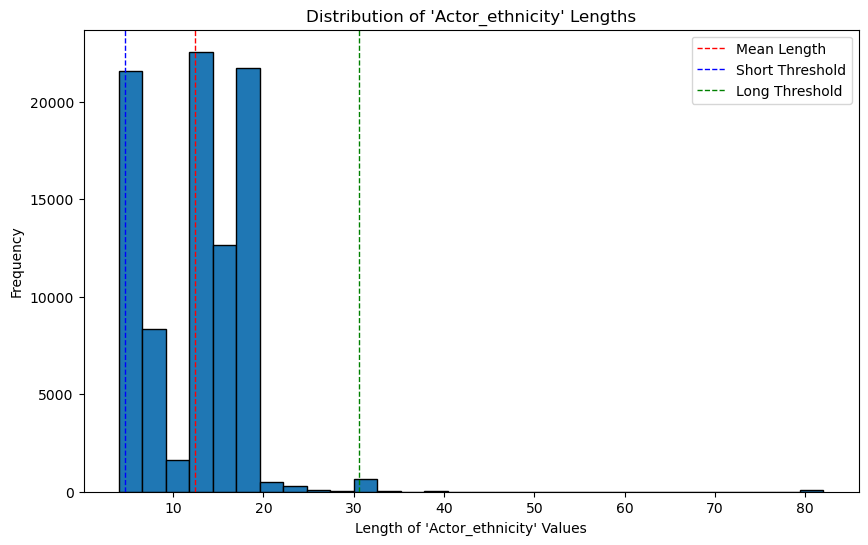

Short Ethnicity Values:


,Actor_ethnicity,Ethnicity_Length
342,Nair,4
529,Bunt,4
1821,Jaat,4
3604,Kiwi,4
3763,Nair,4
...,...,...
448137,Bunt,4
448160,Jaat,4
449145,Jaat,4
450254,Nair,4



Long Ethnicity Values:


,Actor_ethnicity,Ethnicity_Length
952,White Africans of European ancestry,35
1303,Irish migration to Great Britain,32
2778,Irish migration to Great Britain,32
3551,Irish migration to Great Britain,32
6834,freebase_id\n/m/017sq0 Eurasian\n/m/017sq0 ...,82
...,...,...
448434,Irish migration to Great Britain,32
448436,Irish migration to Great Britain,32
449855,Irish migration to Great Britain,32
450200,Irish migration to Great Britain,32


In [21]:
# Verify that this final dataframe is clean

# We look at the length of the ethnicity and look for outsider

# Calculate the length of each value in the 'Actor_ethnicity' column
character_final_df['Ethnicity_Length'] = character_final_df['Actor_ethnicity'].astype(str).apply(len)

# Compute the mean length
mean_length = character_final_df['Ethnicity_Length'].mean()
print(f"Mean length of 'Actor_ethnicity': {mean_length:.2f}")

# Identify unusually long or short values (1.5 and 3.5 found empirically)
std_dev = character_final_df['Ethnicity_Length'].std()
threshold_short = mean_length - 1.5 * std_dev
threshold_long = mean_length + 3.5 * std_dev

short_values = character_final_df[character_final_df['Ethnicity_Length'] < threshold_short]
long_values = character_final_df[character_final_df['Ethnicity_Length'] > threshold_long]

# Visualize the length distribution
plt.figure(figsize=(10, 6))
plt.hist(character_final_df['Ethnicity_Length'], bins=30, edgecolor='black')
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1, label='Mean Length')
plt.axvline(threshold_short, color='blue', linestyle='dashed', linewidth=1, label='Short Threshold')
plt.axvline(threshold_long, color='green', linestyle='dashed', linewidth=1, label='Long Threshold')
plt.title("Distribution of 'Actor_ethnicity' Lengths")
plt.xlabel("Length of 'Actor_ethnicity' Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Display the outlier values
print("Short Ethnicity Values:")
display(short_values[['Actor_ethnicity', 'Ethnicity_Length']])

print("\nLong Ethnicity Values:")
display(long_values[['Actor_ethnicity', 'Ethnicity_Length']])


In [22]:
# We indentify non clean ethnicity value

# Define a function to extract only the ethnicity part
def extract_ethnicity(value):
    # Use regex to find a sequence of words (ethnicity) in the text
    match = re.search(r'\b([A-Za-z\s]+)\b', str(value))
    if match:
        return match.group(0).strip()
    return None

# Apply the function to the 'Actor_ethnicity' column
character_final_df['Actor_ethnicity'] = character_final_df['Actor_ethnicity'].apply(extract_ethnicity)

# Drop rows where ethnicity could not be extracted
character_final_df = character_final_df.dropna(subset=['Actor_ethnicity'])

# Display a sample of cleaned data
display(character_final_df.sample(10))


,Wikipedia_movie_ID,Movie_release_date,Actor_ethnicity,Ethnicity_Length
245568,25157043,1999,Mudaliar,8
446975,16185233,1999,Jewish people,13
260863,2618462,1941,Irish Americans,15
347023,447299,1996,African Americans,17
203771,5034380,2007,Spanish Americans,17
25636,390436,2003,African Americans,17
45499,19863109,1996,Irish migration to Great Britain,32
200644,5352769,2004,Indian,6
365594,254269,1991,Irish people,12
144991,25915620,1990,Malayali,8


In [23]:
# See if it has resolved the problem

# Calculate the length of each value in the 'Actor_ethnicity' column
character_final_df['Ethnicity_Length'] = character_final_df['Actor_ethnicity'].astype(str).apply(len)

# Compute the mean length
mean_length = character_final_df['Ethnicity_Length'].mean()
print(f"Mean length of 'Actor_ethnicity': {mean_length:.2f}")

# Identify unusually long or short values
std_dev = character_final_df['Ethnicity_Length'].std()
threshold_short = mean_length - 1.5 * std_dev
threshold_long = mean_length + 4.5 * std_dev

short_values = character_final_df[character_final_df['Ethnicity_Length'] < threshold_short]
long_values = character_final_df[character_final_df['Ethnicity_Length'] > threshold_long]

# Display the outlier values
print("Short Ethnicity Values:")
display(short_values[['Actor_ethnicity', 'Ethnicity_Length']])

print("\nLong Ethnicity Values:")
display(long_values[['Actor_ethnicity', 'Ethnicity_Length']])

Mean length of 'Actor_ethnicity': 12.36
Short Ethnicity Values:


,Actor_ethnicity,Ethnicity_Length
342,Nair,4
529,Bunt,4
800,Tamil,5
853,Tamil,5
855,Tamil,5
...,...,...
450255,Nair,4
450287,Anglo,5
450473,Indo,4
450583,Tamil,5



Long Ethnicity Values:


,Actor_ethnicity,Ethnicity_Length
952,White Africans of European ancestry,35
8593,White Africans of European ancestry,35
13135,Filipino people of Spanish ancestry,35
15827,White Africans of European ancestry,35
24480,White Africans of European ancestry,35
30635,White Africans of European ancestry,35
33611,White Africans of European ancestry,35
39246,White Africans of European ancestry,35
49661,White Africans of European ancestry,35
60922,White Africans of European ancestry,35


In [24]:
# FINAL CHARACTER DATASET

character_final_df = character_final_df[['Wikipedia_movie_ID', 'Movie_release_date', 'Actor_ethnicity']]
print("DataFrame shape:", character_final_df.shape)
character_final_df.sample(10)

DataFrame shape: (90118, 3)


,Wikipedia_movie_ID,Movie_release_date,Actor_ethnicity
85021,5700623,2006,English people
265055,3158499,1992,African Americans
343317,19105355,1969,Jewish people
37792,10791957,1980,Marathi people
31707,12099919,1984,Indian
211854,973155,2000,African Americans
345405,1260184,1998,French Americans
361999,7676315,2009,Mexican Americans
324868,22660896,1958,Jewish people
209050,8455316,2007,Slovak Americans


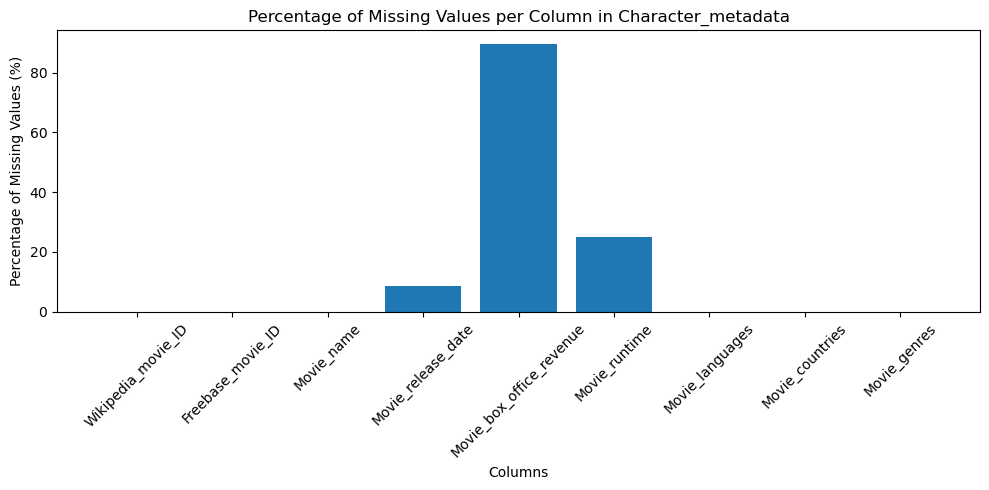

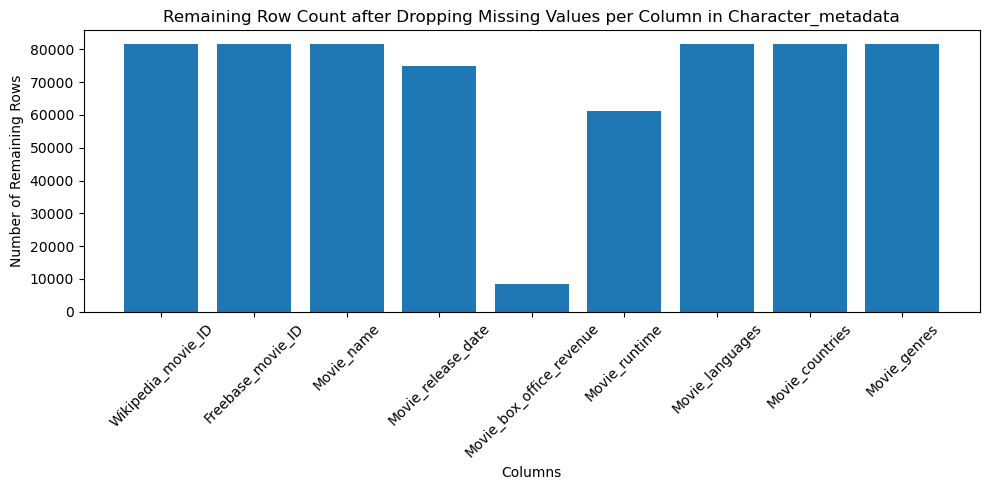

In [25]:
# Clean the MOVIE DATA dataframe:

plot_missing_percentage(movie_metadata)
plot_remaining_rows(movie_metadata)

In [26]:
# Keep the needed informations of the Movie metadata dataframe
# And clean the df: 

# Remaining rows:
columns_to_check = ['Wikipedia_movie_ID', 'Movie_name', 'Movie_release_date', 'Movie_countries']
remaining_rows = {col: movie_metadata[col].dropna().shape[0] for col in columns_to_check}
# Print the results
for col, count in remaining_rows.items():
    print(f"Remaining rows for '{col}': {count}")

# Drop the rows where na
filtered_movie = movie_metadata[['Wikipedia_movie_ID', 'Movie_name', 'Movie_release_date', 'Movie_countries']].dropna(subset=['Wikipedia_movie_ID'])
filtered_movie = filtered_movie[['Wikipedia_movie_ID', 'Movie_name', 'Movie_release_date', 'Movie_countries']].dropna(subset=['Movie_name'])
filtered_movie = filtered_movie[['Wikipedia_movie_ID', 'Movie_name', 'Movie_release_date', 'Movie_countries']].dropna(subset=['Movie_release_date'])
filtered_movie = filtered_movie[['Wikipedia_movie_ID', 'Movie_name', 'Movie_release_date', 'Movie_countries']].dropna(subset=['Movie_countries'])

# Display the updated DataFrame
display(filtered_movie)

Remaining rows for 'Wikipedia_movie_ID': 81740
Remaining rows for 'Movie_name': 81740
Remaining rows for 'Movie_release_date': 74838
Remaining rows for 'Movie_countries': 81740


,Wikipedia_movie_ID,Movie_name,Movie_release_date,Movie_countries
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,"{""/m/09c7w0"": ""United States of America""}"
1,28463795,Brun bitter,1988,"{""/m/05b4w"": ""Norway""}"
2,9363483,White Of The Eye,1987,"{""/m/07ssc"": ""United Kingdom""}"
3,261236,A Woman in Flames,1983,"{""/m/0345h"": ""Germany""}"
4,13696889,The Gangsters,1913-05-29,"{""/m/09c7w0"": ""United States of America""}"
...,...,...,...,...
81735,35228177,Mermaids: The Body Found,2011-03-19,"{""/m/09c7w0"": ""United States of America""}"
81736,34980460,Knuckle,2011-01-21,"{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki..."
81737,9971909,Another Nice Mess,1972-09-22,"{""/m/09c7w0"": ""United States of America""}"
81738,913762,The Super Dimension Fortress Macross II: Lover...,1992-05-21,"{""/m/03_3d"": ""Japan""}"


In [27]:
# Overview of the values in each column
display('Counts for filtered_movie :\n', filtered_movie['Wikipedia_movie_ID'].value_counts(dropna = False),'\n')
display('Counts for filtered_movie :\n', filtered_movie['Movie_name'].value_counts(dropna = False),'\n')
display('Counts for filtered_movie :\n', filtered_movie['Movie_release_date'].value_counts(dropna = False),'\n')
display('Counts for filtered_movie :\n', filtered_movie['Movie_countries'].value_counts(dropna = False),'\n')

'Counts for filtered_movie :\n'

Wikipedia_movie_ID
3196793     1
4185779     1
36288522    1
8335740     1
13990745    1
           ..
34825470    1
24889656    1
32402164    1
12680019    1
12476867    1
Name: count, Length: 74838, dtype: int64

'\n'

'Counts for filtered_movie :\n'

Movie_name
Macbeth                16
Alice in Wonderland    14
A Christmas Carol      13
Les Misérables         13
Hamlet                 11
                       ..
Fires of Kuwait         1
The Godless Girl        1
The Gruffalo            1
Lakshadhikari           1
Spliced                 1
Name: count, Length: 69246, dtype: int64

'\n'

'Counts for filtered_movie :\n'

Movie_release_date
2006          1011
2007           959
2008           949
2005           905
2004           826
              ... 
1987-11-02       1
1971-04-30       1
1909-12-13       1
1932-12-25       1
1992-05-21       1
Name: count, Length: 20389, dtype: int64

'\n'

'Counts for filtered_movie :\n'

Movie_countries
{"/m/09c7w0": "United States of America"}                                                                                                               29180
{"/m/03rk0": "India"}                                                                                                                                    7599
{}                                                                                                                                                       5228
{"/m/07ssc": "United Kingdom"}                                                                                                                           4985
{"/m/03_3d": "Japan"}                                                                                                                                    2012
                                                                                                                                                        ...  
{"/m/0f8l9c": "France", "/m/03_3d": 

'\n'

In [28]:
# First we clean movie_countries:

# Look at empty '{}' in country column:

# Convert strings to dictionaries
filtered_movie['Movie_countries'] = filtered_movie['Movie_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now count the empty dictionaries
empty_dict_count = filtered_movie['Movie_countries'].apply(lambda x: isinstance(x, dict) and len(x) == 0).sum()
print(f"Number of empty dictionaries: {empty_dict_count}") # 139

# Need to drop the row where the country is not known (empty dictionnary)
filtered_movie = filtered_movie[filtered_movie['Movie_countries'].apply(lambda x: isinstance(x, dict) and len(x) > 0)] # 8261

# Display the filtered DataFrame
filtered_movie

Number of empty dictionaries: 5228


,Wikipedia_movie_ID,Movie_name,Movie_release_date,Movie_countries
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,{'/m/09c7w0': 'United States of America'}
1,28463795,Brun bitter,1988,{'/m/05b4w': 'Norway'}
2,9363483,White Of The Eye,1987,{'/m/07ssc': 'United Kingdom'}
3,261236,A Woman in Flames,1983,{'/m/0345h': 'Germany'}
4,13696889,The Gangsters,1913-05-29,{'/m/09c7w0': 'United States of America'}
...,...,...,...,...
81735,35228177,Mermaids: The Body Found,2011-03-19,{'/m/09c7w0': 'United States of America'}
81736,34980460,Knuckle,2011-01-21,"{'/m/03rt9': 'Ireland', '/m/07ssc': 'United Ki..."
81737,9971909,Another Nice Mess,1972-09-22,{'/m/09c7w0': 'United States of America'}
81738,913762,The Super Dimension Fortress Macross II: Lover...,1992-05-21,{'/m/03_3d': 'Japan'}


In [29]:
# Clean country column with only the names of the countries

# Extract only the country names and store them as a set
filtered_movie.loc[:, 'Movie_countries'] = filtered_movie['Movie_countries'].apply(
    lambda x: set(x.values()) if isinstance(x, dict) else set()
)

# Display the updated DataFrame
filtered_movie

,Wikipedia_movie_ID,Movie_name,Movie_release_date,Movie_countries
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,{United States of America}
1,28463795,Brun bitter,1988,{Norway}
2,9363483,White Of The Eye,1987,{United Kingdom}
3,261236,A Woman in Flames,1983,{Germany}
4,13696889,The Gangsters,1913-05-29,{United States of America}
...,...,...,...,...
81735,35228177,Mermaids: The Body Found,2011-03-19,{United States of America}
81736,34980460,Knuckle,2011-01-21,"{Ireland, United Kingdom}"
81737,9971909,Another Nice Mess,1972-09-22,{United States of America}
81738,913762,The Super Dimension Fortress Macross II: Lover...,1992-05-21,{Japan}


In [30]:
# Now we clean release date:
# (as we see that there is several ways to write the date and that there are missing values)

# We need to clean release date (as we see that there is several ways to write the date)
filtered_movie.loc[:,'Movie_release_date'] = filtered_movie['Movie_release_date'].astype(str).str[:4]

# Display the updated DataFrame
display(filtered_movie)


,Wikipedia_movie_ID,Movie_name,Movie_release_date,Movie_countries
0,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000,{United States of America}
1,28463795,Brun bitter,1988,{Norway}
2,9363483,White Of The Eye,1987,{United Kingdom}
3,261236,A Woman in Flames,1983,{Germany}
4,13696889,The Gangsters,1913,{United States of America}
...,...,...,...,...
81735,35228177,Mermaids: The Body Found,2011,{United States of America}
81736,34980460,Knuckle,2011,"{Ireland, United Kingdom}"
81737,9971909,Another Nice Mess,1972,{United States of America}
81738,913762,The Super Dimension Fortress Macross II: Lover...,1992,{Japan}


In [31]:
# Now we clean movie names
# It appears that the same movie name can appear several time

# Convert 'Movie_countries' to a string representation for grouping
filtered_movie_test = filtered_movie.copy()
filtered_movie_test.loc[:,'Movie_countries_str'] = filtered_movie_test['Movie_countries'].apply(lambda x: ', '.join(sorted(x)) if isinstance(x, set) else str(x))

# Group by 'Movie_name', 'Wikipedia_movie_ID', 'Movie_release_date', and 'Movie_countries_str'
merged_filtered_movie_test = (
    filtered_movie_test.groupby(['Movie_name', 'Wikipedia_movie_ID', 'Movie_release_date', 'Movie_countries_str'], as_index=False)
    .agg({'Movie_countries_str': 'first'})  # Retain the merged string representation
)

# Rename the column back to 'Movie_countries' for consistency
merged_filtered_movie_test = merged_filtered_movie_test.rename(columns={'Movie_countries_str': 'Movie_countries'})

# Display the cleaned DataFrame
display(merged_filtered_movie_test)


,Movie_name,Wikipedia_movie_ID,Movie_release_date,Movie_countries
0,!Women Art Revolution,29988427,2010,"Canada, United States of America"
1,#1 Cheerleader Camp,30332673,2010,United States of America
2,$,4213160,1971,United States of America
3,$9.99,20624798,2008,"Australia, Israel"
4,'68,2250713,1988,"Hungary, United States of America"
...,...,...,...,...
69605,Žižkův meč,28379562,1970,Czech Republic
69606,Вчера,6077443,1988,Bulgaria
69607,…All the Marbles,12680019,1981,United States of America
69608,…men Olsenbanden var ikke død,8277007,1984,Norway


Mean length of 'Movie_name': 16.34


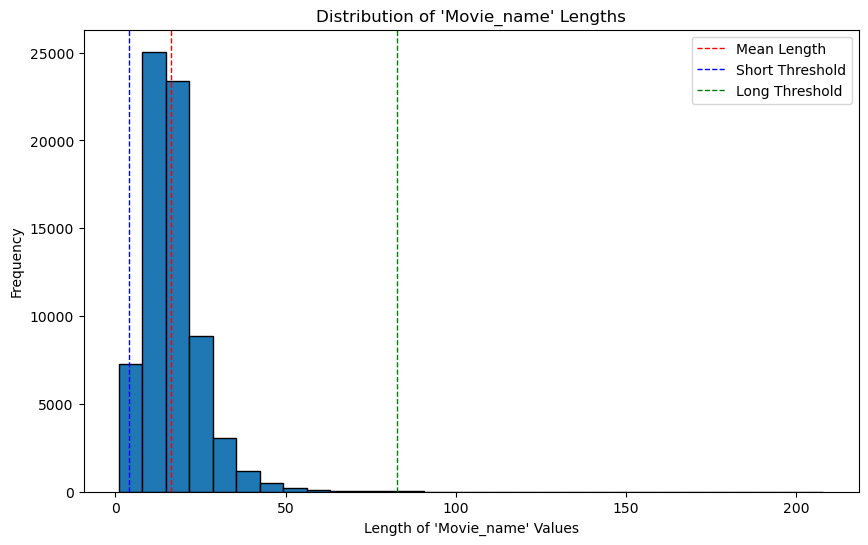

Short Name Values:


,Movie_name,Name_Length
319,EMR,3
322,Amy,3
1227,K2,2
1335,Psy,3
1857,H2O,3
...,...,...
80634,54,2
81257,DNA,3
81286,101,3
81324,She,3



Long Name Values:


,Movie_name,Name_Length
2883,Pleasant Goat and Big Big Wolf: Mission Incred...,84
5734,The Saga of the Viking Women and Their Voyage ...,84
11364,Borat: Cultural Learnings of America for Make ...,83
33145,"\\""FF.SS.\\"" – Cioè: \\""...che mi hai portato ...",98
33713,Farewell Ceremony for His Magesty Emir of Bukh...,85
45378,"Bret ""Hit Man"" Hart: The Best There Is, The Be...",87
47774,Night of the Day of the Dawn of the Son of the...,208
53078,Reyna: ang makulay na pakikipagsapalaran ng mg...,84
58041,Night of the Day of the Dawn of the Son of the...,196
61101,"The Personal History, Adventures, Experience, ...",94


In [32]:
# As the merged df has the same number of rows as the original, it means that no real duplicate was existing 

# Lastly, we verify that this filtered_movie dataframe is super clean, to have the final version

# We look at the length of the movie names and look for outsider:
# Calculate the length of each value in the 'Movie_name' column
filtered_movie.loc[:,'Name_Length'] = filtered_movie['Movie_name'].astype(str).apply(len)

# Compute the mean length
mean_length = filtered_movie['Name_Length'].mean()
print(f"Mean length of 'Movie_name': {mean_length:.2f}")

# Identify unusually long or short values (e.g., 1.5 times the standard deviation)
std_dev = filtered_movie['Name_Length'].std()
threshold_short = mean_length - 1.5 * std_dev
threshold_long = mean_length + 8 * std_dev

short_values = filtered_movie[filtered_movie['Name_Length'] < threshold_short]
long_values = filtered_movie[filtered_movie['Name_Length'] > threshold_long]

# Step 4: Visualize the length distribution
plt.figure(figsize=(10, 6))
plt.hist(filtered_movie['Name_Length'], bins=30, edgecolor='black')
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=1, label='Mean Length')
plt.axvline(threshold_short, color='blue', linestyle='dashed', linewidth=1, label='Short Threshold')
plt.axvline(threshold_long, color='green', linestyle='dashed', linewidth=1, label='Long Threshold')
plt.title("Distribution of 'Movie_name' Lengths")
plt.xlabel("Length of 'Movie_name' Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Display the outlier values
print("Short Name Values:")
display(short_values[['Movie_name', 'Name_Length']])

print("\nLong Name Values:")
display(long_values[['Movie_name', 'Name_Length']])

In [33]:
# No problem has been detected

filtered_movie = filtered_movie[['Wikipedia_movie_ID', 'Movie_name', 'Movie_release_date', 'Movie_countries']]

# Movie name is clean, we can create movie_final_df !

movie_final_df = filtered_movie

In [34]:
display(character_final_df.sample(10))
display(movie_final_df.sample(10))

,Wikipedia_movie_ID,Movie_release_date,Actor_ethnicity
238937,22276971,2008,Jewish people
344312,13594320,2007,Romanian Americans
7858,11448113,2002,African Americans
320992,24796776,2005,French
371771,61141,1946,African Americans
192209,11021128,2007,Indian
90244,1781790,1996,Irish Americans
212945,9192572,2001,Italian immigration to Mexico
267142,92689,1984,Swedish Americans
20044,2452747,1982,African Americans


,Wikipedia_movie_ID,Movie_name,Movie_release_date,Movie_countries
68713,35002710,Angano... Angano... nouvelles de Madagascar,1989,{France}
11021,10700564,"Jenin, Jenin",2002,{Israel}
8945,2815064,The Bow,2005,"{South Korea, Japan}"
73358,10132736,Superman,1941,{United States of America}
58543,6818981,Bavagaru Bagunnara?,1998,{India}
68948,14277983,"Luke, Patient Provider",1916,{United States of America}
42891,11645273,Catnapped!,1995,{Japan}
45211,15052685,Charlie Chan in Paris,1935,{United States of America}
14969,19716141,Galatta Kalyanam,1968,{India}
3935,2819143,Prison Song,2001,{United States of America}


In [35]:
# MERGING

# Merge the two DataFrames on 'Wikipedia_movie_ID' and 'Movie_release_date'
general_info = pd.merge(character_final_df, movie_final_df, on=['Wikipedia_movie_ID', 'Movie_release_date'], how='inner')

# Display the size and the first few rows of the resulting DataFrame
print(general_info.shape)
display(general_info.sample(10))

(86975, 5)


,Wikipedia_movie_ID,Movie_release_date,Actor_ethnicity,Movie_name,Movie_countries
53430,5712265,2002,Indian,Humraaz,{India}
45808,1357356,1988,Italian Americans,Tapeheads,{United States of America}
67384,1179416,1995,English people,First Knight,{United States of America}
28948,28786220,1993,English Americans,Attack of the 50 Ft. Woman,{United States of America}
47278,236122,2001,African Americans,Don't Say a Word,"{Australia, United States of America}"
11682,4120837,1996,English people,The Wind in the Willows,"{Kingdom of Great Britain, United Kingdom}"
84678,3600824,1996,African Americans,A Time to Kill,{United States of America}
42550,8701717,1992,Indian,Seventh Horse of the Sun,{India}
82299,17188776,1989,Irish Americans,The Experts,"{Canada, United States of America}"
74520,9913358,1993,Indian,Anmol,{India}


In [36]:
# We save the final df in .csv format

general_info.to_csv("../data/processed_data/general_info.csv", index=False)


4. Adding the diversity variable

To make analysing ethnicity more easy, we will group the ethnicities into several more general groups, which should also give us a better idea of diversity.

In [37]:
#we first make a list of all the ethnicities there are:
ethnicities_labels = general_info['Actor_ethnicity'].unique().tolist()

In [38]:
#make a map where we can link every ethnicity to a more general ethnicity group
ethnicity_groups = {
    'African': [
        'African Americans', 'Yoruba people', 'Egyptians', 'Kikuyu', 'Xhosa people', 'Somalis', 
        'Mandinka people', 'Malagasy people', 'Afro-Cuban', 'Sudanese Arabs', 'Kabyle people', 
        'Nigerian Americans', 'Sierra Leone Creole people', 'Zulu', 'Berber', 'Blackfoot Confederacy','Mandinka', 'Kikuyu', 'Xhosa', 'Kabyle', 'Somalis', 'Berber', 'Afrikaners'
    ],
    'South Asian': [
        'Indian', 'Ezhava', 'Malayali', 'Gujarati people', 'Bihari people', 'Punjabis', 'Pashtuns', 
        'Telugu people', 'Sri Lankan Tamils', 'Tamil', 'Kayastha', 'Nair', 'Bengali', 'Marwari', 
        'Sindhis', 'Punjabis', 'Rajput', 'Khatri', 'Bengali Brahmins', 'Kashmiri Pandit', 'Indian Americans','Marwari', 'Konkani', 'Kayastha', 'Niyogi', 'Tamil', 'Ezhava', 'Bengali Brahmins', 
        'Sindhis', 'Gujarati people', 'Punjabis', 'Sri Lankan Tamils', 'Telugu people'
    ],
    'Middle Eastern': [
        'Jewish people', 'Israeli Americans', 'Palestinian Americans', 'Arabs', 'Persians', 'Kurdish', 
        'Tatars', 'Assyrian people', 'Azerbaijanis', 'Kurds', 'Lebanese Americans', 'Lebanese', 
        'Iranian Americans', 'Afghan', 'Turks', 'Armenians','Ashkenazi Jews', 'Sephardi Jews', 'Lebanese', 'Copts', 'Israelis', 'Arabs', 'Kurds', 
        'Tatars', 'Ossetians', 'Azerbaijanis', 'Persians', 'Iranians'
    ],
    'European or American': [
        'Germans', 'Swedes', 'British Indian', 'Spaniards', 'British', 'Russians', 'French', 
        'Italians', 'Greek Americans', 'Finnish Americans', 'Scots', 'Irish Americans', 
        'White British', 'Irish migration to Great Britain', 'German Americans', 'Italians','Catalan people', 'Basque people', 'Latvians', 'Baltic Russians', 'Transylvanian Saxons',
        'Corsicans', 'French Chilean', 'Italian Brazilians', 'Luxembourgish Americans', 'White South Africans',
        'Portuguese Americans', 'French Americans', 'French Canadians', 'British Asian'
    ],
    'Indigenous': [
        'Cherokee', 'Navajo', 'Sioux', 'Mohawk', 'Inuit', 'Metis', 'Quechua', 'Maya', 'Apache', 
        'Blackfoot Confederacy', 'Haudenosaunee', 'Ojibwe', 'Inupiat', 'Cheyenne', 'Taino', 
        'Comanche', 'Oneida', 'Zuni','Blackfoot', 'Mohawk', 'Inuit', 'Sioux', 'Lumbee', 'Cheyennes', 'Nez Perce', 'Oneida', 
        'Aymara', 'Inupiat people', 'Haudenosaunee', 'Apache', 'Ojibwe', 'Cherokee', 'Māori'
    ],
    'Latino': [
        'Mexicans', 'Hispanic', 'Spaniards', 'Puerto Ricans', 'Uruguayans', 'Colombians', 
        'Brazilians', 'Argentines', 'Chilean Americans', 'Venezuelan Americans', 'Dominican Americans','Afro-Cuban', 'Chilean American', 'Mexican Americans', 'Spanish Americans', 
        'Uruguayans', 'Dominican Americans', 'Ecuadorian Americans', 'Colombians', 
        'Spanish immigration to Mexico', 'Venezuelans'
    ],
    'Pacific Islander': [
        'Filipino Americans', 'Hawaiian', 'Samoans', 'Tongans', 'Maori', 'Fijians', 
        'Polynesian', 'Micronesian', 'Guamanian', 'Native Hawaiians', 'Marshallese','Filipino mestizo', 'Kapampangan', 'Samoan New Zealanders', 'Chinese Filipino',
        'Vietnamese people', 'Ryukyuan people', 'Japanese Brazilians', 'Japanese Americans', 
        'Pacific Islander Americans'
    ],
    'Mixed': [
        'Anglo-Indian people', 'Afro-Asians', 'Mulatto', 'Mestizo', 'Métis', 'Eurasian', 
        'British African-Caribbean', 'Hapa', 'Amerasians','Afro-Asians', 'multiracial people', 'Métis', 'British African-Caribbean people', 'White Latin American'
    ],
    'Other': [
        'Han Chinese people', 'Japanese Brazilians', 'Dalit', 'Cossacks', 'Tatars', 
        'Romani people', 'Yakuts', 'Hazaras', 'Yugoslavs', 'Ashkenazi Jews', 'Catalan people', 
        'Corsicans', 'Serbs of Bosnia and Herzegovina', 'Aromanians','Koryo-saram', 'Buryats', 'Hmong American', 'Sierra Leone Creole people', 'Dene', 
        'Chettiar', 'Sherpa', 'Tibetan people', 'Malagasy people', 'Hazaras', 'Gin people', 
        'Aromanians', 'Romanichal'
    ]
}

In [39]:
#we want to create a mapping from ethnicity to ethnic group
Ethnicity_to_group = {}
for group, ethnicities in ethnicity_groups.items():
    for ethnicity in ethnicities:
        Ethnicity_to_group[ethnicity] = group

classified_ethnicities = {ethnicity: Ethnicity_to_group.get(ethnicity, 'Unknown') for ethnicity in ethnicities_labels}

In [ ]:
general_info['ethnic_group'] = general_info['Actor_ethnicity'].map(Ethnicity_to_group)

In [42]:
diversity = general_info.groupby('Wikipedia_movie_ID').agg(ethnicity_number=('ethnic_group','nunique'),actor_number=('Wikipedia_movie_ID','size')).reset_index()
diversity['naive_diversity']=diversity['ethnicity_number']/diversity['actor_number']

Now that we have a naive way of measuring diversity for the films, we want to add entropy, which will reward equal representation (3,3,3) compared to a reperesentation such as (7,1,1)

In [47]:
#We use the shannon entropy formula, to which I have added 1 so that we never have an entropy of 0 --> multiplying by 0 removes a lot of data
ethnicity_count = general_info.groupby(['Wikipedia_movie_ID','ethnic_group']).agg('size').reset_index(name='num_actors')
tot_actors = ethnicity_count.groupby('Wikipedia_movie_ID')['num_actors'].transform('sum')

#Shannon entropy will require us to calculate the proportion of every ethnic group (this is the same as probability)
ethnicity_count['proportion'] = ethnicity_count['num_actors']/tot_actors
ethnicity_count['entropy'] = 1-ethnicity_count['proportion'] * np.log(ethnicity_count['proportion'])

#formula of the entropy
movie_entropy = ethnicity_count.groupby('Wikipedia_movie_ID')['entropy'].sum().reset_index()

# Normalise the Shannon entropy
max_entropy = np.log(len(general_info['ethnic_group'].unique()))  # Maximum possible entropy
movie_entropy['normalised_entropy'] = movie_entropy['entropy'] / max_entropy

# merge everything back together
diversity_final = diversity.merge(movie_entropy[['Wikipedia_movie_ID', 'normalised_entropy']], on='Wikipedia_movie_ID', how='left')
diversity_final['diversity'] = diversity_final['naive_diversity']*diversity_final['normalised_entropy']